In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from glob import glob
from sklearn.metrics import r2_score
from math import sqrt
from numpy import concatenate
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import tree
from matplotlib import pyplot
from random import randint
from sklearn.metrics import mean_absolute_error
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from glob import glob
from sklearn.metrics import r2_score
from math import sqrt
from numpy import concatenate
import numpy as np
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import tree
from matplotlib import pyplot
from random import randint
from sklearn.metrics import mean_absolute_error
import math
import numpy as np
np.random.seed(1337)

# import tensorflow as tf
# from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df2016 = pd.read_csv (r'PSM_DesMoines,IA_2016.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
df2017 = pd.read_csv (r'PSM_DesMoines,IA_2017.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
df2018= pd.read_csv (r'PSM_DesMoines,IA_2018.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])
dftraining= df2016.append([df2017,df2018])
dftraining.head()

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Solar Zenith Angle,Wind Speed,Relative Humidity,Temperature,Pressure
0,2016,1,1,0,0,0,0,0,-9.0,160.98,4.2,84.65,-7.0,980
1,2016,1,1,0,30,0,0,0,-9.0,161.24,3.9,84.65,-7.0,980
2,2016,1,1,1,0,0,0,0,-9.0,159.49,3.7,86.55,-8.0,980
3,2016,1,1,1,30,0,0,0,-9.0,156.17,3.8,86.55,-8.0,980
4,2016,1,1,2,0,0,0,0,-10.0,151.85,4.0,84.20,-8.0,980


In [3]:
dftesting = pd.read_csv (r'PSM_DesMoines,IA_2019.csv',index_col = False,skiprows=3, names = ['Year','Month','Day','Hour','Minute','DHI','DNI','GHI','Dew Point','Solar Zenith Angle','Wind Speed','Relative Humidity','Temperature','Pressure'
])

In [50]:
def combine_training_arrays(df, input_arry, output_arr):
    ghi  = df['GHI'].values
    temp  = df['Temperature'].values
    #cloud_cover = df['Cloud Cover'].values
    hours = df['Hour'].values
    minutes = df['Minute'].values
    solar_zenith = df['Solar Zenith Angle'].values
    pressure = df['Pressure'].values
    dhi = df['DHI'].values
    dni = df['DNI'].values
    #Sanity check, should all be 8760
    #assert len(pressure)==len(solar_zenith)==len(minutes)==len(hours)==len(ghi)==8760, "len of input array not 8760"
    ar = np.array([ ghi,hours, minutes, solar_zenith, pressure,temp]).T
    input_array = np.concatenate((input_array, ar))
    output_array = np.concatenate((output_arr, np.array(dhi).T))
    return input_arry, output_array

In [54]:
input_size = 6
input_array = np.array([]).reshape(0,input_size)
output_array = np.array([])

input_array, output_array = combine_training_arrays(dftraining, input_array, output_array)

UnboundLocalError: local variable 'output_array' referenced before assignment

In [52]:
X_train = input_arry 
Y_train = output_arry

print(X_train.shape)
print(Y_train)

(0, 6)
[]


In [20]:


def create_testing_arrays(df, input_arry, output_arr):
    ghi  = df['GHI'].values
    temp  = df['Temperature'].values
    #cloud_cover = df['Cloud Cover'].values
    hours = df['Hour'].values
    minutes = df['Minute'].values
    solar_zenith = df['Solar Zenith Angle'].values
    pressure = df['Pressure'].values
    dhi = df['DHI'].values
    dni = df['DNI'].values
    #Sanity check, should all be 8760
    #assert len(pressure)==len(solar_zenith)==len(minutes)==len(hours)==len(ghi)==8760, "len of input array not 8760"
    ar = np.array([ ghi,hours, minutes, solar_zenith, pressure,temp]).T
    input_arry = np.concatenate((input_array, ar))
    output_array = np.concatenate((output_array, np.array(dhi).T))
    return input_array, output_array

In [21]:
input_size = 6
test_input_array = np.array([]).reshape(0,input_size)
test_output_array = np.array([])

test_input_array, test_output_array = create_testing_arrays(dftesting, test_input_array, test_output_array)

In [22]:
X_test=test_input_array
y_test=test_output_array

print(X_test.shape)
print(y_test.shape)

(17520, 6)
(17520,)


In [23]:

from tensorflow.keras.optimizers import Adam
keras.backend.clear_session()
tf.keras.backend.clear_session()
keras.backend.clear_session()
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph
keras.backend.clear_session()
tf.keras.backend.clear_session()

Epoch 1/100
1643/1643 [==============================] - 1s 661us/step - loss: 64.2140 - accuracy: 0.0897 - val_loss: 33.3131 - val_accuracy: 0.3368
Epoch 2/100
1643/1643 [==============================] - 1s 633us/step - loss: 33.2799 - accuracy: 0.3597 - val_loss: 31.5871 - val_accuracy: 0.3972
Epoch 3/100
1643/1643 [==============================] - 1s 615us/step - loss: 31.7435 - accuracy: 0.3864 - val_loss: 29.9304 - val_accuracy: 0.4485
Epoch 4/100
1643/1643 [==============================] - 1s 615us/step - loss: 29.8777 - accuracy: 0.4314 - val_loss: 28.3203 - val_accuracy: 0.4354
Epoch 5/100
1643/1643 [==============================] - 1s 613us/step - loss: 28.5086 - accuracy: 0.4555 - val_loss: 27.4803 - val_accuracy: 0.4726
Epoch 6/100
1643/1643 [==============================] - 1s 613us/step - loss: 28.0153 - accuracy: 0.4786 - val_loss: 26.7815 - val_accuracy: 0.4842
Epoch 7/100
1643/1643 [==============================] - 1s 594us/step - loss: 27.5850 - accuracy: 0.4887 

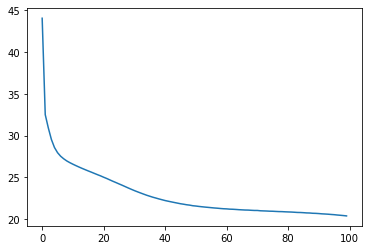

<Figure size 432x288 with 0 Axes>

In [43]:
model = keras.Sequential()
#model.add(layers.Dense(6, input_shape=(6,),activation = "relu"))
# model.add(Activation('relu'))

# model.add(layers.Dense(11,activation = "relu"))
# # model.add(layers.Activation('relu'))
# model.add(layers.Dense(10))
# model.add(layers.Dense(1))

model.add(layers.Dense(6, activation="relu"))
model.add(layers.Dense(10, activation="relu"))
#model.add(layers.Dense(10, activation="relu"))
# model.add(layers.Dense(50, activation="relu"))
# model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(1, activation='relu'))

#model.summary()
# from keras import optimizers
from tensorflow.keras.optimizers import SGD
#sgd = optimizers.SGD(lr=0.1,momentum=0.2)
model.compile(loss='mean_absolute_error',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])

#history = model.fit(X_train, Y_train,
 #                    epochs=100)

history = model.fit(X_train, Y_train,validation_data = (X_test,y_test), epochs=100)
score = model.evaluate(X_test, y_test, verbose=0)
# import matplotlib.pyplot as plt
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

error = score[0]

plt.plot(history.history['loss'])
plt.show()
plt.gcf().clear()


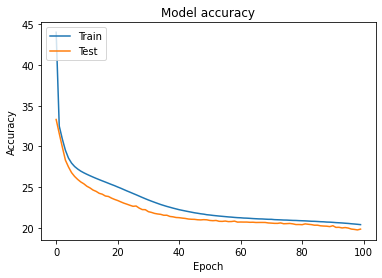

In [44]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(20, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [45]:
print(error)

y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a)

19.82839584350586
Accuracy is: 1.0


In [49]:
pred2s = model.predict(X_test)
print(r2_score(y_test, pred2s))
MSE=mean_squared_error(y_test,pred2s) 
print('mean square error', MSE)

0.8061223901829444
mean square error 1591.7382239616315


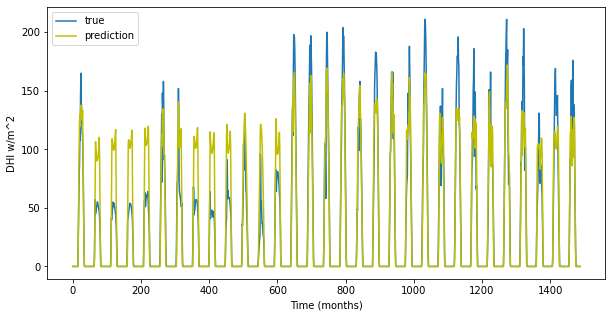

In [47]:
plt.figure(figsize=(10, 5))
# plt.plot(np.arange(len(Y_train[0:49]), len(Y_train) + len(y_test)), y_test, marker='.', label="true")
# plt.plot(np.arange(len(Y_train[0:49]), len(Y_train) + len(y_test)), preds, 'r', label="prediction")
# plt.plot(np.arange(len(y_test)), y_test, marker='', label= "true")

# plt.plot(np.arange( len(y_test)), preds, marker = "", label="prediction")
plt.plot(np.arange(len(y_test[0:1488])), y_test[0:1488], marker='', label="true")
plt.plot(np.arange( len(y_test[0:1488])), pred2s[0:1488], 'y', label="prediction")
plt.ylabel('DHI w/m^2')
plt.xlabel('Time (months)')
# # plt.plot(np.arange(len(y_test)), y_test, marker='.', label="true")
leg = plt.legend();

In [32]:
i = randint(0,8760)
print("index is ",i)
print("Actual ",y_test[i]," ","Predicted ", preds[i])

index is  768
Actual  0.0   Predicted  [0.]


<AxesSubplot:xlabel='Time (months)', ylabel='DHI w/m^2'>

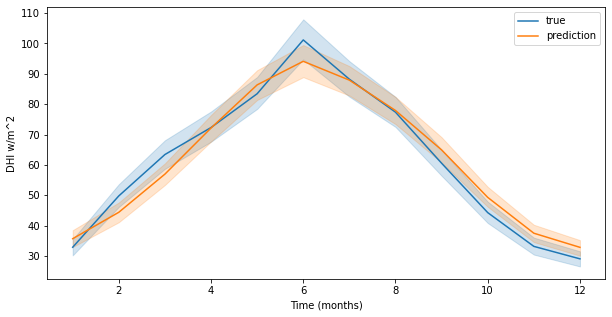

In [48]:
plt.figure(figsize=(10, 5))
plt.ylabel('DHI w/m^2')
plt.xlabel('Time (months)')
sns.lineplot(x = dftesting.Month, y = y_test ,data = dftesting, label="true")
sns.lineplot(x = dftesting.Month, y = pred2s[:,0], data = dftesting, label="prediction")